In [56]:
import urllib.request
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
url = ('http://newsapi.org/v2/top-headlines?country=us&apiKey=f1b67170b7b34330bea156840c9cf126')

In [58]:
response = urllib.request.urlopen(url)

In [59]:
data = response.read().decode('UTF-8')

In [60]:
response_data = json.loads(data)
print(response_data)

{'status': 'ok', 'totalResults': 37, 'articles': [{'source': {'id': None, 'name': 'BBC News'}, 'author': None, 'title': "Sydney church stabbing declared a 'terrorist attack' - BBC.com", 'description': 'A 15-year-old boy is under arrest after a bishop and several churchgoers were injured on Monday.', 'url': 'https://www.bbc.com/news/world-australia-68823240', 'urlToImage': 'https://ichef.bbci.co.uk/news/1024/branded_news/379B/production/_133153241_520efdf7c31595b66ec16a0b5b7ca4d242d8ad560_0_5495_28831000x525.jpg', 'publishedAt': '2024-04-16T02:13:14Z', 'content': None}, {'source': {'id': None, 'name': 'Yahoo Entertainment'}, 'author': 'Yahoo Sports Staff', 'title': 'WNBA Draft 2024: Caitlin Clark goes No. 1 to Indiana Fever; Angel Reese joins Kamilla Cardoso on Chicago Sky - Yahoo Sports', 'description': "Follow along as Caitlin Clark, Cameron Brink, Angel Reese and more find their WNBA homes in Monday's draft.", 'url': 'https://sports.yahoo.com/live/wnba-draft-2024-live-updates-caitlin

In [61]:
for article in response_data["articles"]:
  print(article["source"]["name"])


BBC News
Yahoo Entertainment
The Jerusalem Post
New York Post
CNN
Yahoo Entertainment
The Washington Post
[Removed]
CNYcentral.com
Reuters
Reuters
Axios
Associated Press
Associated Press
ABC News
Yahoo Entertainment
CNN
Android Police
Reuters
SpaceNews


In [62]:
attributes = [[article["source"]["name"],article["author"], article["title"], article["url"], article['publishedAt']] for article in response_data["articles"]]
columns = ['name', 'author', 'title','url', "publishedDate"]
print(attributes)
news_df = pd.DataFrame(attributes, columns=columns)

[['BBC News', None, "Sydney church stabbing declared a 'terrorist attack' - BBC.com", 'https://www.bbc.com/news/world-australia-68823240', '2024-04-16T02:13:14Z'], ['Yahoo Entertainment', 'Yahoo Sports Staff', 'WNBA Draft 2024: Caitlin Clark goes No. 1 to Indiana Fever; Angel Reese joins Kamilla Cardoso on Chicago Sky - Yahoo Sports', 'https://sports.yahoo.com/live/wnba-draft-2024-live-updates-caitlin-clark-kamilla-cardoso-220900847.html', '2024-04-16T02:10:00Z'], ['The Jerusalem Post', 'By  TOVAH LAZAROFF', "Iran's attack is an 'embarrassing failure,' a success for Israel, says US - The Jerusalem Post", 'https://www.jpost.com/middle-east/irans-attack-is-an-embarrassing-failure-a-success-for-israel-says-us-797324', '2024-04-16T01:55:09Z'], ['New York Post', 'Stefan Bondy', 'Jalen Brunson snubbed by Team USA with 2024 Olympics roster revealed - New York Post ', 'https://nypost.com/2024/04/15/sports/jalen-brunson-snubbed-by-team-usa-for-2024-olympic-roster/', '2024-04-16T01:42:00Z'], ['C

In [63]:
news_df.head(10)

,name,author,title,url,publishedDate
0,BBC News,None,Sydney church stabbing declared a 'terrorist a...,https://www.bbc.com/news/world-australia-68823240,2024-04-16T02:13:14Z
1,Yahoo Entertainment,Yahoo Sports Staff,WNBA Draft 2024: Caitlin Clark goes No. 1 to I...,https://sports.yahoo.com/live/wnba-draft-2024-...,2024-04-16T02:10:00Z
2,The Jerusalem Post,By TOVAH LAZAROFF,"Iran's attack is an 'embarrassing failure,' a ...",https://www.jpost.com/middle-east/irans-attack...,2024-04-16T01:55:09Z
3,New York Post,Stefan Bondy,Jalen Brunson snubbed by Team USA with 2024 Ol...,https://nypost.com/2024/04/15/sports/jalen-bru...,2024-04-16T01:42:00Z
4,CNN,"By <a href=""/profiles/kara-scannell-profile"">K...",Day 1 of Trump New York hush money trial - CNN,https://www.cnn.com/politics/live-news/trump-h...,2024-04-16T01:06:00Z
5,Yahoo Entertainment,Jason Owens,D.J. Wagner continues 5-star exodus from Kentu...,https://sports.yahoo.com/dj-wagner-continues-5...,2024-04-16T00:47:00Z
6,The Washington Post,Cleve R. Wootson Jr.,Biden uses release of 2023 tax returns to draw...,https://www.washingtonpost.com/politics/2024/0...,2024-04-16T00:43:00Z
7,[Removed],None,[Removed],https://removed.com,1970-01-01T00:00:00Z
8,CNYcentral.com,Emma Misiaszek,Officers killed in line of duty identified as ...,https://cnycentral.com/news/local/officers-kil...,2024-04-16T00:11:15Z
9,Reuters,Victoria Waldersee,Tesla laying off more than 10% of staff global...,https://www.reuters.com/business/autos-transpo...,2024-04-15T23:32:27Z


In [64]:
# Saving the data into the csv file
news_df.to_csv('/content/news_data.csv')

Text(0.5, 1.0, 'Publishers')

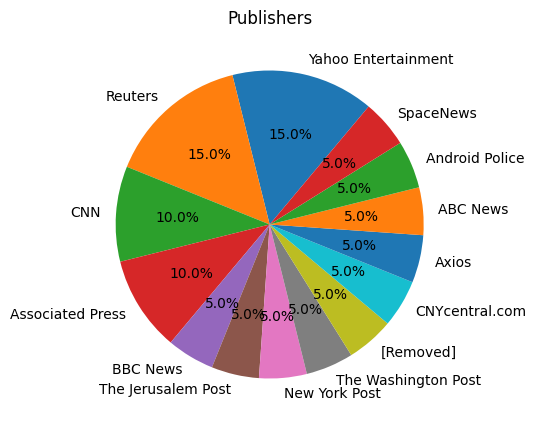

In [65]:
publisher_count = news_df["name"].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(publisher_count, labels=publisher_count.index, autopct='%1.1f%%', startangle=50)
plt.title('Publishers')